Nama : Ibnu Riski <br>
Email : ibnuriski28@gmail.com <br>
Posisi : Data Analyst (Technology) <br>

Jawaban Soal No 3

# Question 3

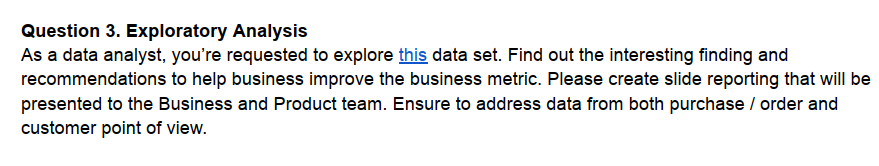

### Exploratory Analysis

Melakukan Load Data

In [40]:
import pandas as pd

# Ubah tautan menjadi tautan langsung ke file
file_id = "1ME-fMgjeS2w-eQRuDXJ9xH_JL3Kfi786"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

### Melihat Ringkasan Data

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset dari Google Drive (pastikan tautan langsung ke file mentah)
file_id = "1ME-fMgjeS2w-eQRuDXJ9xH_JL3Kfi786"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

# Melihat ringkasan data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

#### Distribusi penjualan

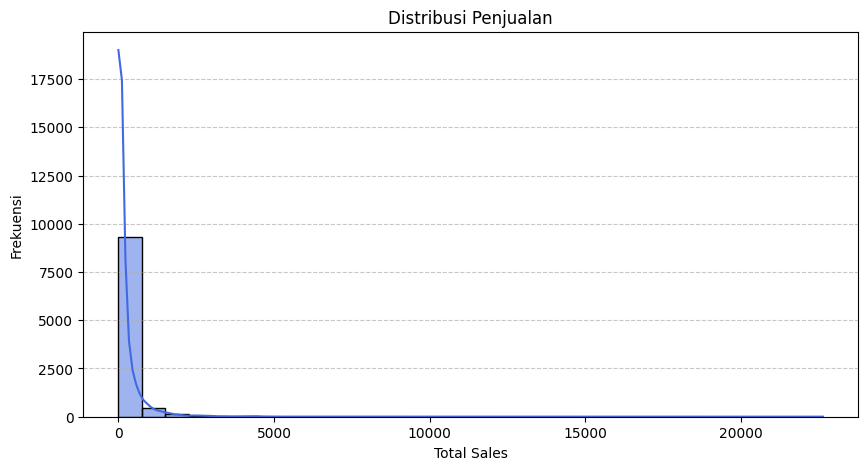

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Sales"], bins=30, kde=True, color="royalblue")
plt.title("Distribusi Penjualan")
plt.xlabel("Total Sales")
plt.ylabel("Frekuensi")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

> Dari histogram distribusi penjualan yang telah dibuat, terlihat bahwa mayoritas nilai penjualan berada pada angka yang lebih rendah, sedangkan penjualan bernilai tinggi jarang terjadi. Hal ini menunjukkan bahwa distribusi penjualan cenderung memiliki skewness ke kanan (right-skewed distribution)—di mana sebagian besar transaksi terjadi dengan nilai kecil, sementara hanya sedikit transaksi yang bernilai besar.

#### Produk terlaris berdasarkan jumlah unit yang terjual

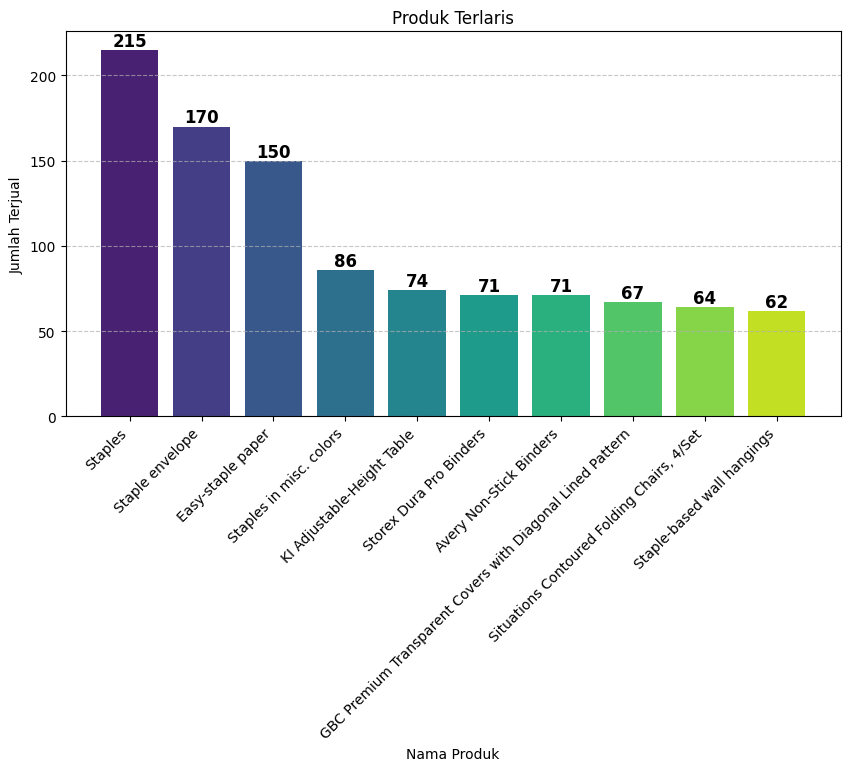

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("viridis", len(top_products_df))

plt.figure(figsize=(10, 5))
bars = plt.bar(top_products_df["Product Name"], top_products_df["Total Quantity Sold"], color=colors)
plt.title("Produk Terlaris")
plt.xlabel("Nama Produk")
plt.ylabel("Jumlah Terjual")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
    )

plt.show()

- Staples adalah produk terlaris dengan 215 unit terjual, jauh melebihi produk lain..
- Selisih jumlah terjual antara produk sangat besar, menunjukkan bahwa hanya sedikit produk yang benar-benar mendominasi penjualan.
- Produk dengan penjualan rendah mungkin perlu strategi promosi atau bundling agar lebih menarik bagi pelanggan.
- Pada produk dengan total penjualan 62 hingga 74 selisihnya begitu sangat berdekatan.

#### Perjualan Per Kategori

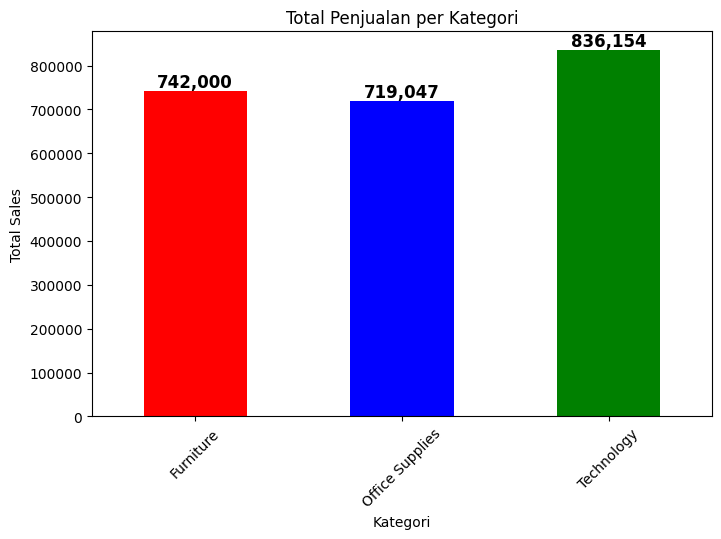

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

category_sales = df.groupby("Category")["Sales"].sum()

plt.figure(figsize=(8, 5))
bars = category_sales.plot(kind="bar", color=["red", "blue", "green"])

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",
        ha="center", va="bottom", fontsize=12, fontweight="bold"
    )

plt.title("Total Penjualan per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

> - Gambar tersebut menunjukkan bahwa kategori Technology memiliki total penjualan tertinggi dibandingkan dengan Furniture dan Office Supplies. Ini menunjukkan bahwa produk teknologi lebih diminati atau memiliki nilai transaksi lebih tinggi.
> - Furniture memiliki penjualan lebih tinggi dibandingkan Office Supplies, tetapi masih lebih rendah dari Technology.
> - Office Supplies memiliki penjualan paling rendah, yang bisa berarti produk dalam kategori ini memiliki harga lebih murah atau jumlah transaksi lebih sedikit.


#### Pelanggan dengan pembelian tertinggi

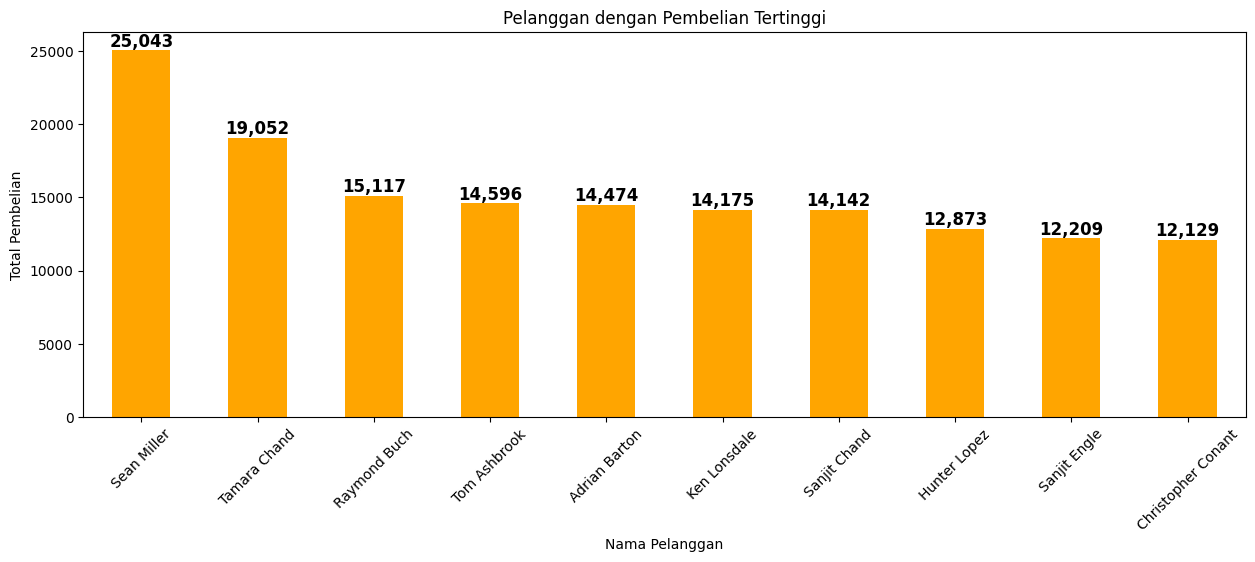

In [56]:
top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 5))
top_customers.plot(kind="bar", color="orange")
plt.title("Pelanggan dengan Pembelian Tertinggi")
plt.xlabel("Nama Pelanggan")
plt.ylabel("Total Pembelian")
plt.xticks(rotation=45)

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",
        ha="center", va="bottom", fontsize=12, fontweight="bold"
    )


plt.show()

 - Pelanggan dengan total pembelian terbesar adalah Sean Miller, yang memiliki transaksi jauh lebih besar dibandingkan pelanggan lain. Hal ini menunjukkan bahwa ia mungkin merupakan pelanggan loyal atau memiliki kebutuhan bisnis yang signifikan. Selain itu, Tamara Chand juga termasuk dalam daftar pelanggan dengan pembelian tinggi, menjadikannya target potensial untuk program loyalitas atau penawaran khusus.

- Secara keseluruhan, daftar pelanggan terbaik menunjukkan pola distribusi yang cukup stabil—artinya bisnis tidak hanya bergantung pada satu atau dua pelanggan besar, tetapi memiliki basis pelanggan yang lebih luas. Dari data ini, strategi pemasaran dapat difokuskan pada meningkatkan retensi pelanggan utama, misalnya melalui program loyalitas atau penawaran eksklusif untuk mereka yang sering bertransaksi dalam jumlah besar.